In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('wines_SPA.csv')
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [52]:
unique_classes = df['type'].unique()
unique_classes

array(['Toro Red', 'Tempranillo', 'Ribera Del Duero Red', 'Pedro Ximenez',
       'Red', 'Priorat Red', 'Rioja Red', 'Rioja White', 'Grenache',
       'Cava', 'Sherry', 'Verdejo', 'Syrah', 'Monastrell', 'Mencia',
       'Sparkling', 'Montsant Red', 'Albarino', 'Chardonnay',
       'Cabernet Sauvignon', 'Sauvignon Blanc'], dtype=object)

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

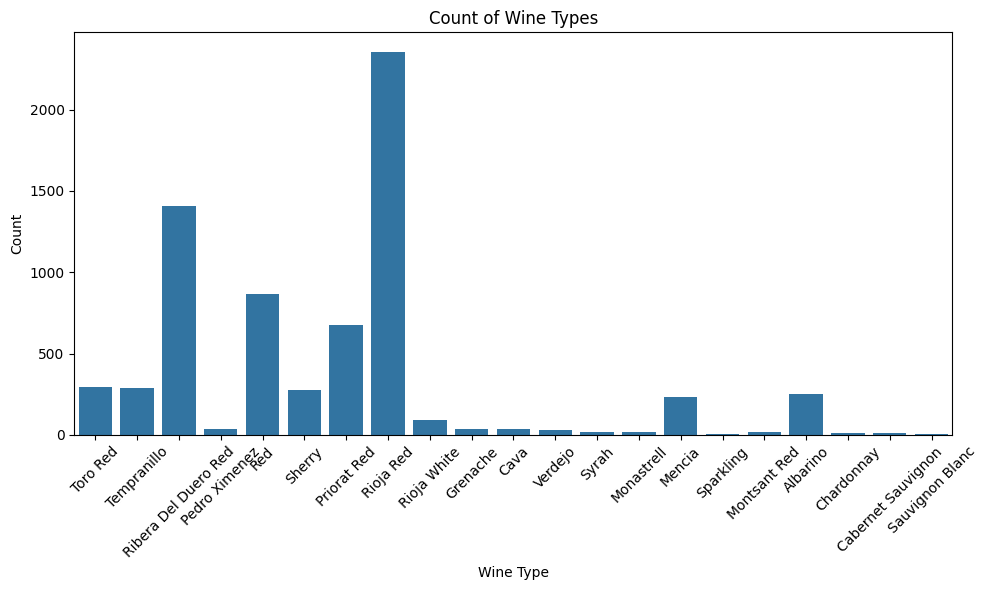

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type')
plt.title('Count of Wine Types')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [27]:
numeric_columns = ['year', 'rating', 'num_reviews', 'price', 'body', 'acidity']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(inplace=True)

label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])

# Remove non-numeric columns
numeric_df = df.drop(columns=['winery', 'wine', 'country', 'region', 'type'])

In [28]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,type_encoded
0,Teso La Monja,Tinto,2013.0,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0,19
1,Artadi,Vina El Pison,2018.0,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0,18
2,Vega Sicilia,Unico,2009.0,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0,11
3,Vega Sicilia,Unico,1999.0,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0,11
4,Vega Sicilia,Unico,1996.0,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0,11


## Correlation Matrix

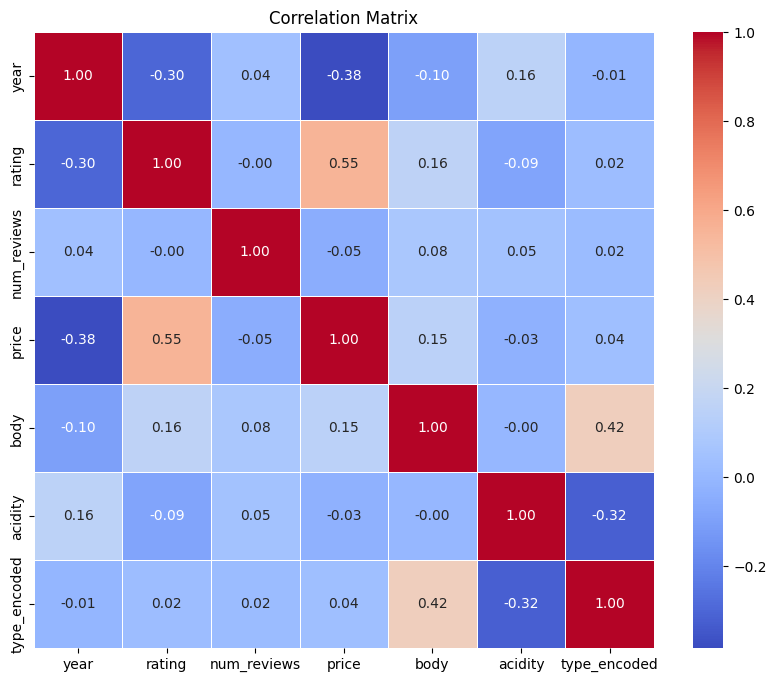

In [43]:
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [62]:
X = df[['year', 'rating', 'num_reviews', 'price', 'body', 'acidity']]
y = df['type_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
clf.score(X_test,y_test)

0.9019769357495881

In [36]:
y_pred = clf.predict(X_test)

## Confussion Matrix

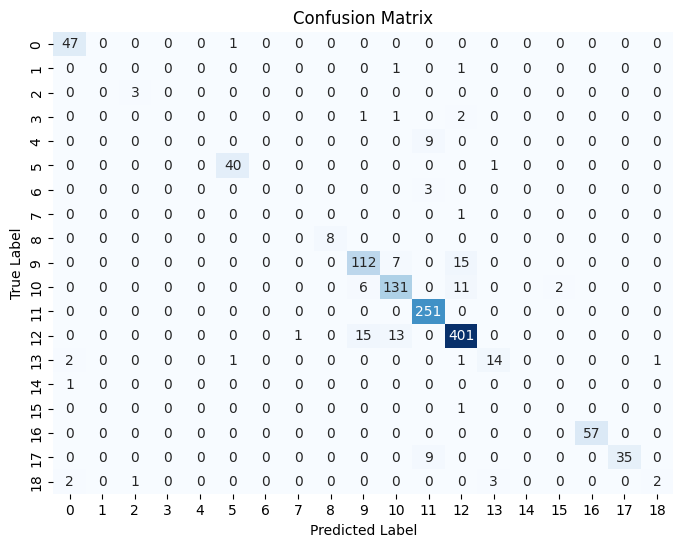

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()